# WeatherPy
----
Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

For Part I, you must include a written description of three observable trends based on the data.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress
from datetime import datetime

# Import API key
import sys
sys.path.append('..')
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=1593ca34fafc115085ecbdd8c2d56aa7

Call for several city IDs
Parameters:
id City ID
Examples of API calls:
http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric

The limit of locations is 20.
If you request weather data for several ID, then you will get the response only in JSON format (XML and HTML formats are not available for this case).
NOTE: A single ID counts as a one API call! So, the above example is treated as a 3 API calls.

## Generate Cities List

# Markdown so you don't rerun the code
#List for holding lat_lngs and cities
lat_lngs = []
cntry_code =[]
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

countries = []
cities=[]
#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    cntry_code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    #print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print(cities)
        countries.append(cntry_code)

In [3]:
city_country = pd.DataFrame({"city" : cities,
                           "country" : countries})

city_country.head()
diction = {}
for x in range(len(countries)):
    diction[city_country['city'][x]] = city_country['country'][x]

#    diction[city_country.iloc[0,x]] = city_country.iloc[x,0]

#diction

NameError: name 'cities' is not defined

In [256]:
city_country.head()



'mn'

In [239]:
#at 60 calls per minute, how many sets should we do?
len(cities)/60 #11

10.033333333333333

In [179]:
then = int(time.time())


In [188]:
now = int(time.time())
timeamt = now-then
print(f'now is probably {timeamt} seconds later than then')
timeamt
time.sleep(5)
timeamt=timeamt
print(f'now is probably {timeamt} seconds later than then')

now is probably 1001 seconds later than then
now is probably 1001 seconds later than then


In [264]:
round(len(cities)/set_size)

10

api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

api.openweathermap.org/data/2.5/weather?q={city name},{state}&appid={your api key}

api.openweathermap.org/data/2.5/weather?q={city name},{state},{country code}&appid={your api key}

Parameters:
q city name, state and country code divided by comma, use ISO 3166 country codes. You can specify the parameter not only in English. In this case, the API response should be returned in the same language as the language of requested location name if the location is in our predefined list of more than 200,000 locations.

Examples of API calls:
api.openweathermap.org/data/2.5/weather?q=London

api.openweathermap.org/data/2.5/weather?q=London,uk

In [267]:
set_size = 60
number_of_sets = int(len(cities)/set_size)+1
#number_of_sets = 3
#for city in cities:
#    city_name = city
#    country_code = diction[city]
#    print(f'{city_name}, {country_code}')

API call:
http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={APIKEY}
Parameters:
APPID {APIKEY} is your unique API key
Example of API call:
api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1111111111

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [270]:
time_start = int(time.time())
setnum = 1
recordnum = 1 
api_response_dict = {}

while recordnum < set_size:
    print(f'Beginning Data Retrieval \n Start Time = {time_start} \n ---------------------------')
    for city in cities:   
        city_name = city
        country_code = diction[city]
        query = f'{city_name},{country_code}'
        url =f'{base}{query}&appid={weather_api_key}'
        print(f'Processing Record {recordnum} of Set {setnum} | {city}')
        response = requests.get(url).json()
        if response['cod'] != 200:
            print(f'{city_name} Not Found. Skipping...')
        else:
            print(f'City Found, adding to dictionary')
            api_response_dict[city] = response
        if city == cities[len(cities)-1]:
            print("We're done here")
            recordnum = set_size
        elif recordnum < set_size:
            #print(f'should be in set {setnum}. moving to next record')
            recordnum += 1
        else:       
            time_elapsed = int(time.time()) - time_start            
            while time_elapsed < 60:
                print(f"It's only been {time_elapsed} seconds. waiting...")
                time.sleep(3)
                time_elapsed = int(time.time()) - time_start
            if setnum < number_of_sets:
                setnum += 1
                recordnum = 1
                print(f'Continuing on to Set {setnum}')
                time_start = int(time.time())


        

#stop += 60

#base=f'https://api.openweathermap.org/data/2.5/weather?q='
#url =f'{base}{query}&appid={weather_api_key}'

Beginning Data Retrieval 
 Start Time = 1589077548 
 ---------------------------
Processing Record 1 of Set 1 | mandalgovi
City Found, adding to dictionary
Processing Record 2 of Set 1 | hilo
City Found, adding to dictionary
Processing Record 3 of Set 1 | busselton
City Found, adding to dictionary
Processing Record 4 of Set 1 | bredasdorp
City Found, adding to dictionary
Processing Record 5 of Set 1 | rocha
City Found, adding to dictionary
Processing Record 6 of Set 1 | banjar
City Found, adding to dictionary
Processing Record 7 of Set 1 | wajid
City Found, adding to dictionary
Processing Record 8 of Set 1 | punta arenas
City Found, adding to dictionary
Processing Record 9 of Set 1 | saraza
City Found, adding to dictionary
Processing Record 10 of Set 1 | darhan
City Found, adding to dictionary
Processing Record 11 of Set 1 | carnarvon
City Found, adding to dictionary
Processing Record 12 of Set 1 | burica
burica Not Found. Skipping...
Processing Record 13 of Set 1 | lagoa
City Found, a

City Found, adding to dictionary
Processing Record 44 of Set 2 | angra
angra Not Found. Skipping...
Processing Record 45 of Set 2 | khatanga
City Found, adding to dictionary
Processing Record 46 of Set 2 | airai
airai Not Found. Skipping...
Processing Record 47 of Set 2 | sao filipe
City Found, adding to dictionary
Processing Record 48 of Set 2 | caravelas
City Found, adding to dictionary
Processing Record 49 of Set 2 | samatau
samatau Not Found. Skipping...
Processing Record 50 of Set 2 | quballat
City Found, adding to dictionary
Processing Record 51 of Set 2 | narsaq
City Found, adding to dictionary
Processing Record 52 of Set 2 | cheuskiny
cheuskiny Not Found. Skipping...
Processing Record 53 of Set 2 | flinders
City Found, adding to dictionary
Processing Record 54 of Set 2 | kavaratti
City Found, adding to dictionary
Processing Record 55 of Set 2 | dikson
City Found, adding to dictionary
Processing Record 56 of Set 2 | ribeira grande
City Found, adding to dictionary
Processing Reco

City Found, adding to dictionary
Processing Record 21 of Set 4 | hirtshals
City Found, adding to dictionary
Processing Record 22 of Set 4 | sangar
City Found, adding to dictionary
Processing Record 23 of Set 4 | longyearbyen
City Found, adding to dictionary
Processing Record 24 of Set 4 | tarata
City Found, adding to dictionary
Processing Record 25 of Set 4 | ostersund
City Found, adding to dictionary
Processing Record 26 of Set 4 | laguna
City Found, adding to dictionary
Processing Record 27 of Set 4 | paradwip
paradwip Not Found. Skipping...
Processing Record 28 of Set 4 | banda aceh
City Found, adding to dictionary
Processing Record 29 of Set 4 | cairns
City Found, adding to dictionary
Processing Record 30 of Set 4 | marquette
City Found, adding to dictionary
Processing Record 31 of Set 4 | cosina
City Found, adding to dictionary
Processing Record 32 of Set 4 | sheboygan
City Found, adding to dictionary
Processing Record 33 of Set 4 | albanel
City Found, adding to dictionary
Process

It's only been 41 seconds. waiting...
It's only been 44 seconds. waiting...
It's only been 47 seconds. waiting...
It's only been 50 seconds. waiting...
It's only been 53 seconds. waiting...
It's only been 56 seconds. waiting...
It's only been 59 seconds. waiting...
Continuing on to Set 6
Processing Record 1 of Set 6 | orapa
City Found, adding to dictionary
Processing Record 2 of Set 6 | naze
City Found, adding to dictionary
Processing Record 3 of Set 6 | kalangala
City Found, adding to dictionary
Processing Record 4 of Set 6 | bolshoye sorokino
bolshoye sorokino Not Found. Skipping...
Processing Record 5 of Set 6 | olafsvik
City Found, adding to dictionary
Processing Record 6 of Set 6 | katsuura
City Found, adding to dictionary
Processing Record 7 of Set 6 | ornskoldsvik
City Found, adding to dictionary
Processing Record 8 of Set 6 | bowral
City Found, adding to dictionary
Processing Record 9 of Set 6 | lata
lata Not Found. Skipping...
Processing Record 10 of Set 6 | bengkulu
City Foun

japura Not Found. Skipping...
Processing Record 42 of Set 7 | isangel
City Found, adding to dictionary
Processing Record 43 of Set 7 | chiradzulu
City Found, adding to dictionary
Processing Record 44 of Set 7 | calabozo
City Found, adding to dictionary
Processing Record 45 of Set 7 | upernavik
City Found, adding to dictionary
Processing Record 46 of Set 7 | wasilla
City Found, adding to dictionary
Processing Record 47 of Set 7 | fairbanks
City Found, adding to dictionary
Processing Record 48 of Set 7 | sinnamary
City Found, adding to dictionary
Processing Record 49 of Set 7 | altay
City Found, adding to dictionary
Processing Record 50 of Set 7 | levashovo
City Found, adding to dictionary
Processing Record 51 of Set 7 | mayumba
City Found, adding to dictionary
Processing Record 52 of Set 7 | ternate
City Found, adding to dictionary
Processing Record 53 of Set 7 | high level
City Found, adding to dictionary
Processing Record 54 of Set 7 | ossora
City Found, adding to dictionary
Processin

City Found, adding to dictionary
Processing Record 19 of Set 9 | innisfail
City Found, adding to dictionary
Processing Record 20 of Set 9 | sorkjosen
City Found, adding to dictionary
Processing Record 21 of Set 9 | manggar
City Found, adding to dictionary
Processing Record 22 of Set 9 | nanning
City Found, adding to dictionary
Processing Record 23 of Set 9 | praia da vitoria
City Found, adding to dictionary
Processing Record 24 of Set 9 | umm lajj
City Found, adding to dictionary
Processing Record 25 of Set 9 | khanewal
City Found, adding to dictionary
Processing Record 26 of Set 9 | pascagoula
City Found, adding to dictionary
Processing Record 27 of Set 9 | twentynine palms
City Found, adding to dictionary
Processing Record 28 of Set 9 | dunmore east
City Found, adding to dictionary
Processing Record 29 of Set 9 | meyungs
meyungs Not Found. Skipping...
Processing Record 30 of Set 9 | angoche
City Found, adding to dictionary
Processing Record 31 of Set 9 | bima
City Found, adding to di

It's only been 25 seconds. waiting...
It's only been 28 seconds. waiting...
It's only been 31 seconds. waiting...
It's only been 34 seconds. waiting...
It's only been 37 seconds. waiting...
It's only been 40 seconds. waiting...
It's only been 43 seconds. waiting...
It's only been 46 seconds. waiting...
It's only been 49 seconds. waiting...
It's only been 52 seconds. waiting...
It's only been 55 seconds. waiting...
It's only been 58 seconds. waiting...
Continuing on to Set 11
Processing Record 1 of Set 11 | saleaula
saleaula Not Found. Skipping...
Processing Record 2 of Set 11 | tougan
City Found, adding to dictionary
We're done here


In [272]:
api_response_dict.keys()
len(api_response_dict)
#df = pd.DataFrame(api_response_dict)
#df.to_csv("api_response_bad.csv")
#api_response_dict['illoqqortoormiut']

535

In [277]:
api_response_dict['hilo']

{'coord': {'lon': -155.09, 'lat': 19.73},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 298.66,
  'feels_like': 298.96,
  'temp_min': 297.04,
  'temp_max': 300.15,
  'pressure': 1018,
  'humidity': 57},
 'visibility': 16093,
 'wind': {'speed': 2.6, 'deg': 10},
 'clouds': {'all': 90},
 'dt': 1589077320,
 'sys': {'type': 1,
  'id': 7881,
  'country': 'US',
  'sunrise': 1589039217,
  'sunset': 1589085999},
 'timezone': -36000,
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [376]:
citykeys = []
Lat = []
Long =[]
Max_Temp =[]
Humidity =[]
Cloudiness =[]
Clouds2 = []
Wind_Speed = []
Country = []
Date = []
Cloud_pct = []

for key in api_response_dict.keys():
    citykeys.append(key)
    Lat.append(api_response_dict[key]['coord']['lat'])
    Long.append(api_response_dict[key]['coord']['lon'])
    Max_Temp.append(api_response_dict[key]['main']['temp_max'] - 273.15)
    Humidity.append(api_response_dict[key]['main']['humidity'])
    Cloudiness.append(api_response_dict[key]['weather'][0]['description'])
    Clouds2.append(api_response_dict[key]['weather'][0]['main'])
    Cloud_pct.append(api_response_dict[key]['clouds']['all'])
    Wind_Speed.append(api_response_dict[key]['wind']['speed'])
    Country.append(api_response_dict[key]['sys']['country'])
    Date.append(datetime.utcfromtimestamp(api_response_dict[key]['dt']))

   # key['coord']['lon']
    #key['coord']['lat']
    #key['weather']
#citykeys
#subkeys

#Clouds2
#Date


#api_response_dict[key].keys()

In [378]:
weather_df = pd.DataFrame({'City': citykeys,
                           'Latitude': Lat,
                           'Longitude': Long,
                           'Max_Temp': Max_Temp,
                           'Humidity': Humidity,
                           'Cloudiness': Cloud_pct,
                           'Description': Cloudiness,
                           'Wind_Speed': Wind_Speed,
                           'Country': Country,
                           'Date': Date})
'''
City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64
'''
weather_df.to_csv("weather_df.csv")
weather_df


,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Description,Wind_Speed,Country,Date
0,mandalgovi,45.76,106.27,4.68,58,0,clear sky,8.70,MN,2020-05-10 02:25:48
1,hilo,19.73,-155.09,27.00,57,90,overcast clouds,2.60,US,2020-05-10 02:22:00
2,busselton,-33.65,115.33,16.67,45,40,scattered clouds,0.93,AU,2020-05-10 02:25:49
3,bredasdorp,-34.53,20.04,14.00,93,0,clear sky,1.00,ZA,2020-05-10 02:25:49
4,rocha,-34.48,-54.33,10.72,85,0,clear sky,3.35,UY,2020-05-10 02:22:39
...,...,...,...,...,...,...,...,...,...,...
530,west odessa,31.84,-102.50,24.00,27,1,clear sky,4.10,US,2020-05-10 02:35:18
531,kemijarvi,66.71,27.43,-1.39,95,30,scattered clouds,1.45,FI,2020-05-10 02:35:18
532,chimbote,-9.09,-78.58,19.88,86,77,broken clouds,3.82,PE,2020-05-10 02:33:50
533,bartlesville,36.75,-95.98,12.78,76,1,clear sky,0.79,US,2020-05-10 02:32:49


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [380]:
cityhumid = weather_df[weather_df['Humidity'] > 100]

cityhumid
#no cities. skipping.

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Description,Wind_Speed,Country,Date


In [381]:
#doing a better test way
weather_df.describe()

,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,20.420916,17.946150,17.460953,67.568224,47.295327,3.845720
std,33.210041,93.712753,10.171377,22.653193,40.016414,2.780496
min,-54.800000,-175.200000,-16.000000,6.000000,0.000000,0.250000
25%,-5.885000,-67.465000,10.390000,54.000000,1.000000,2.000000
50%,24.130000,24.730000,18.450000,73.000000,42.000000,3.250000
75%,49.625000,106.095000,26.020000,86.000000,90.000000,5.100000
max,78.220000,179.320000,36.530000,100.000000,100.000000,26.000000


In [489]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#no

In [490]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
#already did this.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [491]:
df = weather_df
weather_df.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Description,Wind_Speed,Country,Date
0,mandalgovi,45.76,106.27,4.68,58,0,clear sky,8.70,MN,2020-05-10 02:25:48
1,hilo,19.73,-155.09,27.00,57,90,overcast clouds,2.60,US,2020-05-10 02:22:00
2,busselton,-33.65,115.33,16.67,45,40,scattered clouds,0.93,AU,2020-05-10 02:25:49
3,bredasdorp,-34.53,20.04,14.00,93,0,clear sky,1.00,ZA,2020-05-10 02:25:49
4,rocha,-34.48,-54.33,10.72,85,0,clear sky,3.35,UY,2020-05-10 02:22:39


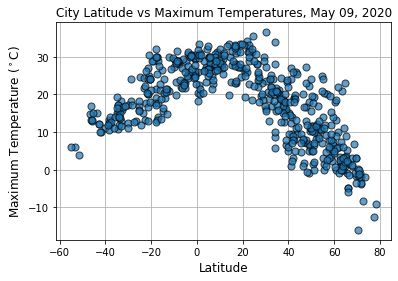

In [492]:
#Pandas Scatter Plot
figname = "Latitude_MaxTemp.png"
x = df.Latitude
y = df.Max_Temp
scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('Maximum Temperature ($^\circ$C)', fontsize = 12)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_title("City Latitude vs Maximum Temperatures, May 09, 2020")
#ax.set_xlim((-90,90))

plt.show()
fig.savefig(figname)

## Latitude vs. Humidity Plot

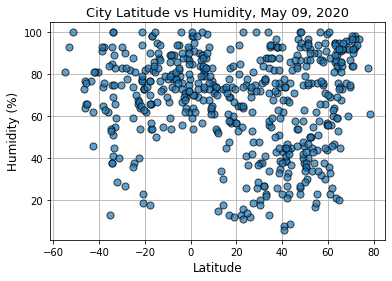

In [493]:
#Pandas Scatter Plot
figname = "Latitude_Humidity.png"
x = df.Latitude
y = df.Humidity
scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('Humidity (%)', fontsize = 12)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_title("City Latitude vs Humidity, May 09, 2020", fontsize =13)
#ax.set_xlim((-90,90))

plt.show()
fig.savefig(figname)

## Latitude vs. Cloudiness Plot

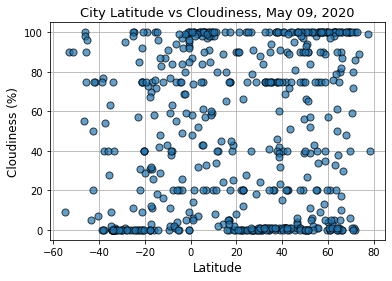

In [494]:
#Pandas Scatter Plot
figname = "Latitude_Cloudiness.png"
x = df.Latitude
y = df.Cloudiness
scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('Cloudiness (%)', fontsize = 12)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_title("City Latitude vs Cloudiness, May 09, 2020", fontsize =13)
#ax.set_xlim((-90,90))

plt.show()
fig.savefig(figname)

## Latitude vs. Wind Speed Plot

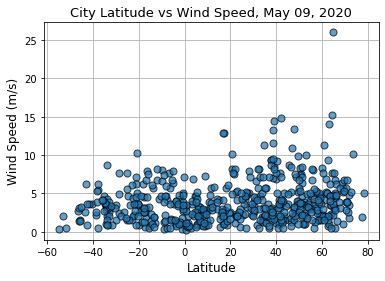

In [495]:
#Pandas Scatter Plot
figname = "Latitude_WindSpeed.png"
x = df.Latitude
y = df.Wind_Speed
scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel('Wind Speed (m/s)', fontsize = 12)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_title("City Latitude vs Wind Speed, May 09, 2020", fontsize =13)
#ax.set_xlim((-90,90))

plt.show()
fig.savefig(figname)

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames

In [496]:
ndf = df[df['Latitude'] > 0]
sdf = df[df['Latitude'] < 0]
anythingelse =df[df['Latitude'] == 0]
anythingelse

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Description,Wind_Speed,Country,Date


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

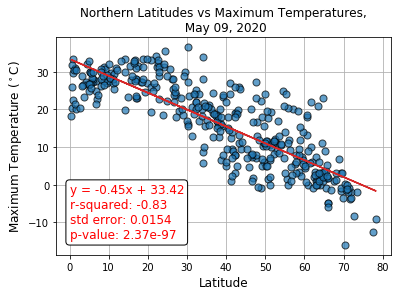

In [520]:
hemisphere = 'Northern'
mapplot = 'Max_Temp'
if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df.Max_Temp
#####
xlabel = 'Latitude'
ylabel = 'Maximum Temperature ($^\circ$C)'
title = f"{hemisphere} Latitudes vs Maximum Temperatures,\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'


slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.plot(x, regression_line, "tab:red")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (0,-14.3), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k"))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")

plt.show()
fig.savefig(figname)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

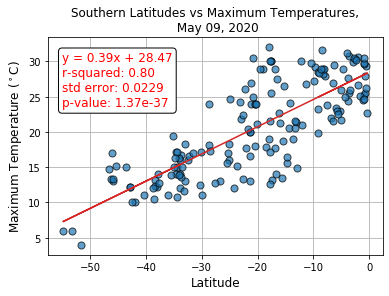

In [521]:
hemisphere = 'Southern'
mapplot = 'Max_Temp'

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df.Max_Temp
#####
xlabel = 'Latitude'
ylabel = 'Maximum Temperature ($^\circ$C)'
title = f"{hemisphere} Latitudes vs Maximum Temperatures,\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'

slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.plot(x, regression_line, "tab:red")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (-55,23.6), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k"))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")

plt.show()
fig.savefig(figname)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

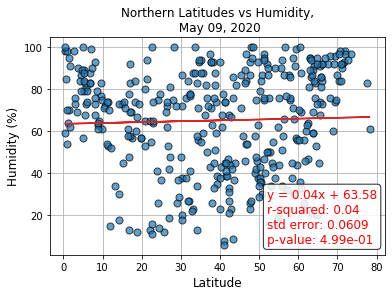

In [522]:
hemisphere = 'Northern'
mapplot ="Humidity"

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df.Humidity
#####
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
title = f"{hemisphere} Latitudes vs Humidity,\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'


slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.plot(x, regression_line, "tab:red")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (52,7), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k", alpha=0.85))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")

plt.show()
fig.savefig(figname)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

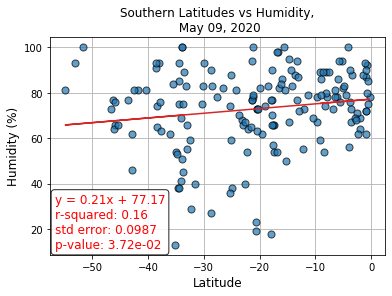

In [523]:
hemisphere = 'Southern'
mapplot = 'Humidity'

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df.Humidity
#####
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
title = f"{hemisphere} Latitudes vs Humidity,\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'
slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.plot(x, regression_line, "tab:red")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (-56.7,11.5), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k", alpha=0.85))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")

plt.show()
fig.savefig(figname)

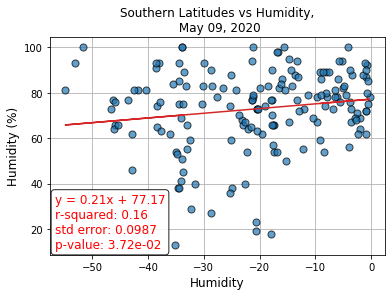

In [501]:
hemisphere = 'Southern'

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df.Humidity
#####
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
title = f"{hemisphere} Latitudes vs Humidity,\n May 09, 2020"
figname = f'{hemisphere}_Lat_{xlabel}.png'
slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.plot(x, regression_line, "tab:red")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (-56.7,11.5), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k", alpha=0.85))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")

plt.show()
fig.savefig(figname)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

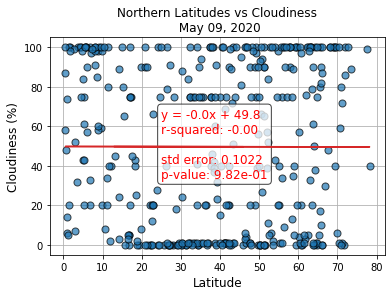

In [530]:
hemisphere = 'Northern'
mapplot = 'Cloudiness'
ylabel = f'{mapplot} (%)'

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df[mapplot]
#####
xlabel = 'Latitude'

title = f"{hemisphere} Latitudes vs {mapplot}\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'


slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')

ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (25,34), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k", alpha=0.75), 
            zorder=1)
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.plot(x, regression_line, "tab:red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")
fig.savefig(figname)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

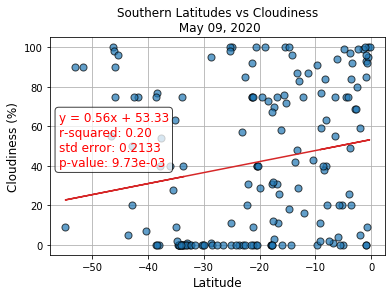

In [525]:
hemisphere = 'Southern'
mapplot = 'Cloudiness'
ylabel = f'{mapplot} (%)'

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df[mapplot]
#####
xlabel = 'Latitude'

title = f"{hemisphere} Latitudes vs {mapplot}\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'
slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.plot(x, regression_line, "tab:red")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (-56,40), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k", alpha=0.75))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")

plt.show()
fig.savefig(figname)

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

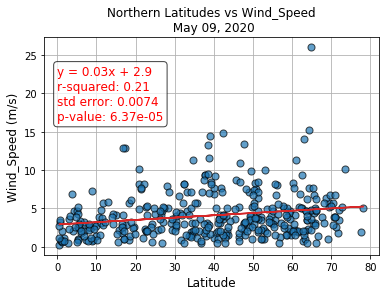

In [529]:
hemisphere = 'Northern'
mapplot = 'Wind_Speed'
ylabel = f'{mapplot} (m/s)'

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df[mapplot]
#####
xlabel = 'Latitude'

title = f"{hemisphere} Latitudes vs {mapplot}\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'

slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')

ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (0,16.5), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k", alpha=0.75))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.plot(x, regression_line, "tab:red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")
fig.savefig(figname)
plt.show()

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

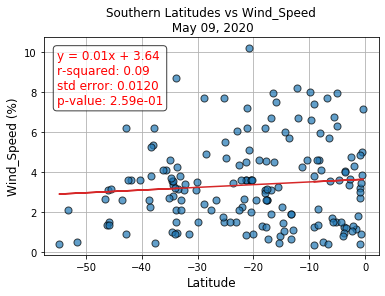

In [528]:
hemisphere = 'Southern'
mapplot = 'Wind_Speed'
ylabel = f'{mapplot} (%)'

if hemisphere == 'Southern':
    df = sdf
elif hemisphere == 'Northern':
    df = ndf
else:
    df = 'cats'

x = df.Latitude
y = df[mapplot]
#####
xlabel = 'Latitude'

title = f"{hemisphere} Latitudes vs {mapplot}\n May 09, 2020"
figname = f'{hemisphere}_Lat_{mapplot}.png'
slope, intercept, r_value, p_value, std_err = linregress(x, y)
m = slope
b = intercept
regression_line = m * x + b

regression_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = f'r-squared: {r_value:.2f}'
p = f'p-value: {p_value:.2e}'
s = f'std error: {std_err:.4f}'
annotation = f'{regression_equation}\n{r}\n{s}\n{p}'
######

scale = 50.0

fig, ax = plt.subplots()
ax.scatter(x, y, c='tab:blue', s=scale,
            alpha=0.7, edgecolors='black')
ax.plot(x, regression_line, "tab:red")
ax.grid(True)
ax.set_axisbelow(True)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_xlabel(xlabel, fontsize=12)
ax.annotate(annotation, (-55.2,7.4), fontsize=12, color="red",  bbox=dict(boxstyle='round', fc="w", ec="k", alpha=0.75))
#ax.annotate(r, (-2.5,5), fontsize=13, color="red")
#ax.annotate(s, (-2.5,0), fontsize=13, color="red")
#ax.annotate(p, (-2.5,-5), fontsize=13, color="red")
ax.set_title(title)
#ax.set_xlim((-90,90))
#print(f"The r-squared is: {r_value}")
#print(f"The p-val is: {p_value}")

plt.show()
fig.savefig(figname)